# Regression using keras

In [1]:
import pandas as pd
df=pd.read_csv("https://data.heatonresearch.com/data/t81-558/jh-simple-dataset.csv",na_values=['NA','?'])

In [2]:
display(df[0:5])

,id,job,area,income,aspect,subscriptions,dist_healthy,save_rate,dist_unhealthy,age,pop_dense,retail_dense,crime,product
0,1,vv,c,50876.0,13.100000,1,9.017895,35,11.738935,49,0.885827,0.492126,0.071100,b
1,2,kd,c,60369.0,18.625000,2,7.766643,59,6.805396,51,0.874016,0.342520,0.400809,c
2,3,pe,c,55126.0,34.766667,1,3.632069,6,13.671772,44,0.944882,0.724409,0.207723,b
3,4,11,c,51690.0,15.808333,1,5.372942,16,4.333286,50,0.889764,0.444882,0.361216,b
4,5,kl,d,28347.0,40.941667,3,3.822477,20,5.967121,38,0.744094,0.661417,0.068033,a


here we need to convert area,income,product into dummies for further processing

In [3]:
df=pd.concat([df,pd.get_dummies(df['area'],prefix='area')],axis=1)
df=df.drop('area',axis=1)

In [4]:
df=pd.concat([df,pd.get_dummies(df['job'],prefix='job')],axis=1)
df=df.drop('job',axis=1)

In [5]:
df=pd.concat([df,pd.get_dummies(df['product'],prefix='product')],axis=1)
df=df.drop('product',axis=1)

# Check and treat for missing values

In [6]:
df.isna().sum()

id                 0
income            59
aspect             0
subscriptions      0
dist_healthy       0
save_rate          0
dist_unhealthy     0
age                0
pop_dense          0
retail_dense       0
crime              0
area_a             0
area_b             0
area_c             0
area_d             0
job_11             0
job_al             0
job_am             0
job_ax             0
job_bf             0
job_by             0
job_cv             0
job_de             0
job_dz             0
job_e2             0
job_f8             0
job_gj             0
job_gv             0
job_kd             0
job_ke             0
job_kl             0
job_kp             0
job_ks             0
job_kw             0
job_mm             0
job_nb             0
job_nn             0
job_ob             0
job_pe             0
job_po             0
job_pq             0
job_pz             0
job_qp             0
job_qw             0
job_rn             0
job_sa             0
job_vv             0
job_zz       

Observation: Income column has missing values

In [7]:
df['income'].describe()

count     1941.000000
mean     56924.861927
std      10188.938399
min      19846.000000
25%      51336.000000
50%      58633.000000
75%      64407.000000
max      88671.000000
Name: income, dtype: float64

In [8]:
import seaborn as sns
sns.set_style("whitegrid") 
sns.boxplot(y = 'income', data = df) 

Clearly there are outliers so replacing missing values with median

In [9]:
df['income']=df['income'].fillna(df['income'].median())

Standardisation of numeric values with z scores

In [10]:
from scipy.stats import zscore
df['income']=zscore(df['income'])
df['aspect'] = zscore(df['aspect'])
df['save_rate'] = zscore(df['save_rate'])
df['subscriptions'] = zscore(df['subscriptions'])

In [11]:
# dependent and independent variable split. here age is dependent variable
y=df['age'].values
x_columns=df.columns.drop(['age','id'])
x=df[x_columns].values

In [12]:
# Test train split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=100)

In [13]:
x.shape

(2000, 53)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.callbacks import EarlyStopping
model=Sequential()
model.add(Dense(25,input_dim=x.shape[1],activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
monitor=EarlyStopping(monitor='val_loss',min_delta=1e-3,patience=5,verbose=1,mode='auto',restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=1000)

Train on 1500 samples, validate on 500 samples
Epoch 1/1000
1500/1500 - 2s - loss: 2346.5138 - val_loss: 2137.2508
Epoch 2/1000
1500/1500 - 0s - loss: 2073.6423 - val_loss: 1989.5670
Epoch 3/1000
1500/1500 - 0s - loss: 1779.4283 - val_loss: 1464.4639
Epoch 4/1000
1500/1500 - 0s - loss: 1160.4030 - val_loss: 770.8236
Epoch 5/1000
1500/1500 - 0s - loss: 557.6113 - val_loss: 333.0887
Epoch 6/1000
1500/1500 - 0s - loss: 297.2082 - val_loss: 251.5650
Epoch 7/1000
1500/1500 - 0s - loss: 253.5124 - val_loss: 232.5251
Epoch 8/1000
1500/1500 - 0s - loss: 232.4357 - val_loss: 212.9814
Epoch 9/1000
1500/1500 - 0s - loss: 210.5237 - val_loss: 191.2304
Epoch 10/1000
1500/1500 - 0s - loss: 184.4354 - val_loss: 167.3552
Epoch 11/1000
1500/1500 - 0s - loss: 161.0115 - val_loss: 146.0858
Epoch 12/1000
1500/1500 - 0s - loss: 139.5136 - val_loss: 126.9750
Epoch 13/1000
1500/1500 - 0s - loss: 120.7122 - val_loss: 110.3499
Epoch 14/1000
1500/1500 - 0s - loss: 104.1963 - val_loss: 95.4146
Epoch 15/1000
1500

Epoch 129/1000
1500/1500 - 0s - loss: 0.6744 - val_loss: 0.6468
Epoch 130/1000
1500/1500 - 0s - loss: 0.6618 - val_loss: 0.6379
Epoch 131/1000
1500/1500 - 0s - loss: 0.6579 - val_loss: 0.6185
Epoch 132/1000
1500/1500 - 0s - loss: 0.6375 - val_loss: 0.6415
Epoch 133/1000
1500/1500 - 0s - loss: 0.6520 - val_loss: 0.6036
Epoch 134/1000
1500/1500 - 0s - loss: 0.6500 - val_loss: 0.6052
Epoch 135/1000
1500/1500 - 0s - loss: 0.6241 - val_loss: 0.5841
Epoch 136/1000
1500/1500 - 0s - loss: 0.6174 - val_loss: 0.6751
Epoch 137/1000
1500/1500 - 0s - loss: 0.6553 - val_loss: 0.6013
Epoch 138/1000
1500/1500 - 0s - loss: 0.6418 - val_loss: 0.6180
Epoch 139/1000
1500/1500 - 0s - loss: 0.6711 - val_loss: 0.6199
Epoch 140/1000
1500/1500 - 0s - loss: 0.6184 - val_loss: 0.5703
Epoch 141/1000
1500/1500 - 0s - loss: 0.6448 - val_loss: 0.5565
Epoch 142/1000
1500/1500 - 0s - loss: 0.6148 - val_loss: 0.5663
Epoch 143/1000
1500/1500 - 0s - loss: 0.5923 - val_loss: 0.5422
Epoch 144/1000
1500/1500 - 0s - loss: 0.

In [16]:
import numpy as np
from sklearn import metrics
pred=model.predict(x_test)
score=metrics.mean_squared_error(pred,y_test)
rmse=np.sqrt(score)
print(f"mean squared error is :{score},root_mean_squared_error:{rmse}")

mean squared error is :0.44004575571246096,root_mean_squared_error:0.6633594468404448


# Lift Chart

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
def lift_chart(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

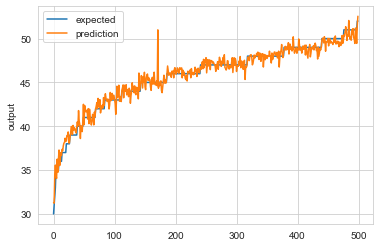

In [18]:
lift_chart(pred.flatten(),y_test)